In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
import numpy as np

class Brownian:
    """
    Create a Brownian motion class.
    """
    def __init__(self, initial_value=0):
        """
        Initialize the class (initial value = 0) for Brownian motion.
        
        Parameters:
        - initial_value (float or int, optional): Initial value of Brownian motion = 0 (by default)
        """
        if not (isinstance(initial_value, (float, int)) or initial_value is None):
            raise ValueError("Expected a float, int, or None for the initial value.")
        
        self.initial_value = float(initial_value)
    
    def generate_random_walk(self, num_steps=100):
        """
        To generate a random walk with a specified num_steps.
        
        Parameters:
        - num_steps (int, optional): Number of steps for the walk. Defaults to 100.
        
        Returns:
        - np.ndarray: A NumPy array with `num_steps` points.
        """
        if num_steps < 30:
            print("WARNING: A small number of steps may not produce accurate stochastic process sequence.")
        
        walk = np.full(num_steps, self.initial_value)
        
        for step in range(1, num_steps):
            # Sample from a uniform distribution of 1 or -1
            step_direction = np.random.choice([1, -1])
            # Update the walk with the scaled step
            walk[step] = walk[step - 1] + step_direction / np.sqrt(num_steps)
        
        return walk
    
    def generate_normal_walk(self, num_steps=100):
        """
        Generate a random walk using the normal distribution.
        
        Parameters:
        - num_steps (int, optional): Number of steps for the walk. Defaults to 100.
        
        Returns:
        - np.ndarray: A NumPy array with `num_steps` points.
        """
        if num_steps < 30:
            print("WARNING: A small number of steps may not produce an accurate stochastic process sequence.")
        
        walk = np.full(num_steps, self.initial_value)
        
        for step in range(1, num_steps):
            # Sample from a standard normal distribution
            random_step = np.random.normal()
            # Update the walk with the scaled step
            walk[step] = walk[step - 1] + random_step / np.sqrt(num_steps)
        
        return walk
    
    def stock_price(
                    self,
                    s0=100,
                    mu=0.2,
                    sigma=0.68,
                    deltaT=52,
                    dt=0.1
                    ):
        """
        Models a stock price S(t) using the Weiner process W(t) as
        `S(t) = S(0).exp{(mu-(sigma^2/2).t)+sigma.W(t)}`
        
        Arguments:
            s0: Iniital stock price, default 100
            mu: 'Drift' of the stock (upwards or downwards), default 1
            sigma: 'Volatility' of the stock, default 1
            deltaT: The time period for which the future prices are computed, default 52 (as in 52 weeks)
            dt (optional): The granularity of the time-period, default 0.1
        
        Returns:
            s: A NumPy array with the simulated stock prices over the time-period deltaT
        """
        n_step = int(deltaT/dt)
        time_vector = np.linspace(0,deltaT,num=n_step)
        # Stock variation
        stock_var = (mu-(sigma**2/2))*time_vector
        # Forcefully set the initial value to zero for the stock price simulation
        self.x0=0
        # Weiner process (calls the `gen_normal` method)
        weiner_process = sigma*self.generate_normal_walk(n_step)
        # Add two time series, take exponent, and multiply by the initial stock price
        s = s0*(np.exp(stock_var+weiner_process))
        
        return s

In [52]:
b = Brownian()

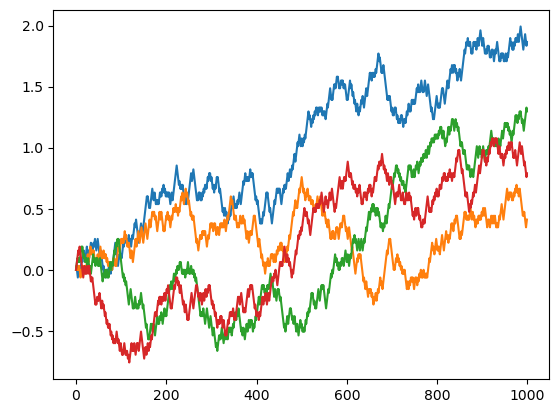

In [53]:

for i in range(4):
    plt.plot(b.generate_random_walk(1000))
plt.show()

Process with initial value of 50 and using Normal distribution

In [54]:
b = Brownian(20)

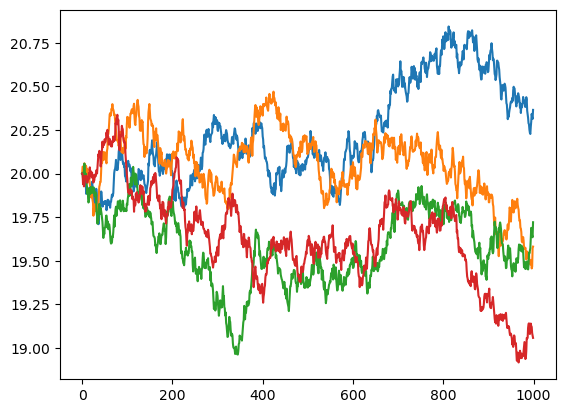

In [55]:
for i in range(4):
    plt.plot(b.generate_normal_walk(1000))
plt.show()

Stock price simulation


In [56]:
def plot_stock_price(mu,sigma):
    """
    Plots stock price for multiple scenarios
    """
    plt.figure(figsize=(9,4))
    for i in range(5):
        plt.plot(b.stock_price(mu=mu,
                               sigma=sigma,
                               dt=0.1))
    plt.legend(['Scenario-'+str(i) for i in range(1,6)],
               loc='upper left')
    plt.hlines(y=100,xmin=0,xmax=520,
               linestyle='--',color='k')
    plt.show()

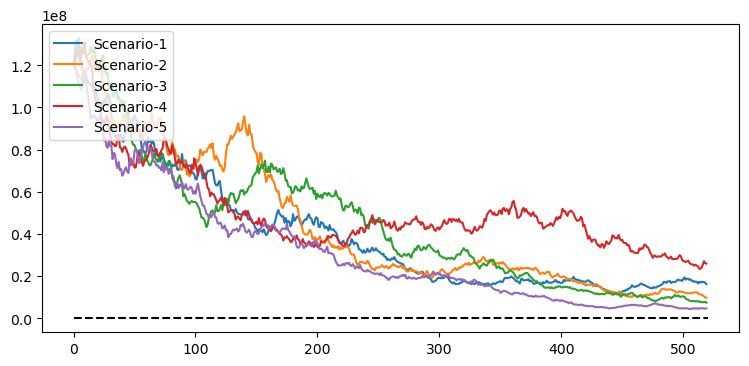

In [57]:
plot_stock_price(mu=0.2,sigma=0.7)


A slight change in the volatility


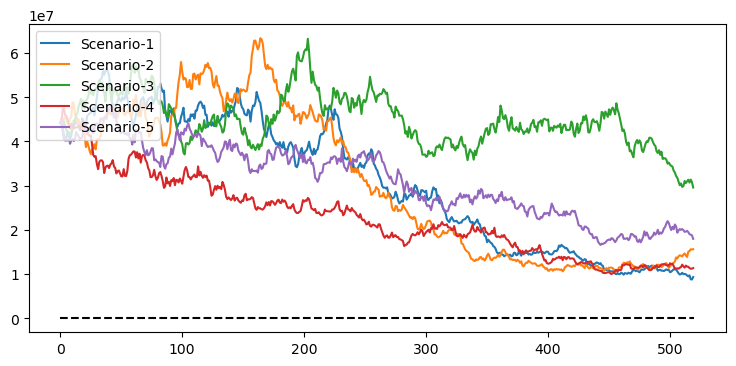

In [58]:
plot_stock_price(mu=0.2,sigma=0.65
                 )


Lowering the volatility further down


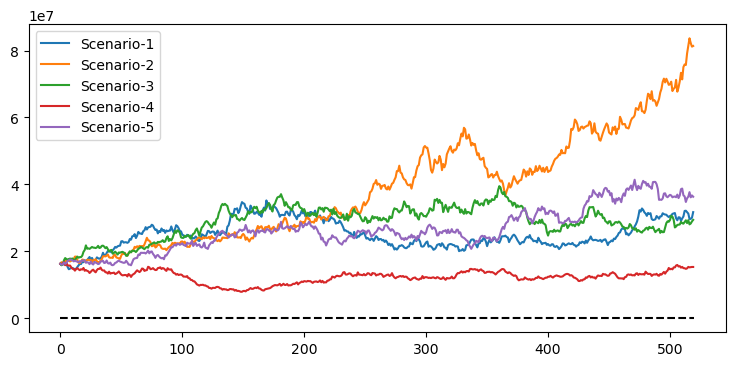

In [59]:
plot_stock_price(mu=0.2,sigma=0.6)


Two-dimensional plot


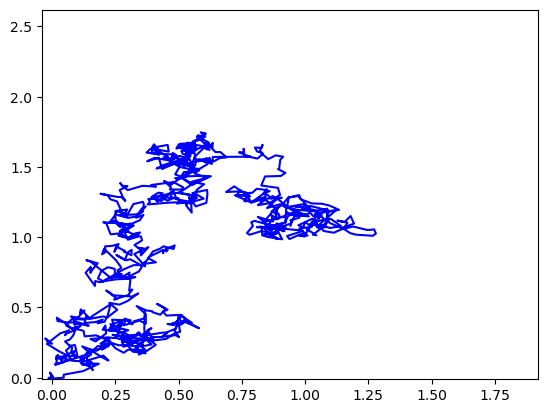

In [65]:
b1 = Brownian()
b2 = Brownian()

x = b1.generate_normal_walk(1000)
y = b2.generate_normal_walk(1000)

plt.plot(x,y,c='b')
xmax,xmin,ymax,ymin = x.max(),x.min(),y.max(),y.min()
scale_factor = 1.5
xmax,xmin,ymax,ymin = xmax*scale_factor,xmin*scale_factor,ymax*scale_factor,ymin*scale_factor
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.show()

Biased motion in 2 D

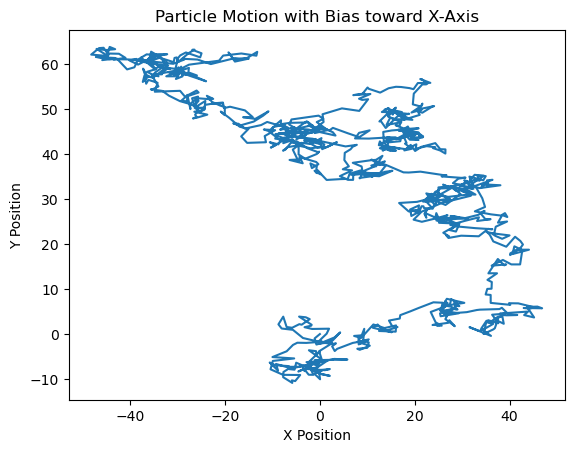

In [74]:
import numpy as np

class BiasedMotion:
    """
    A class to simulate the motion of a particle with a preference for movement along the x-axis.
    """
    def __init__(self, x0=0, y0=0, bias=2):
        """
        Initializes the class with initial positions and bias.
        
        Arguments:
            x0: Initial x-coordinate (default is 0).
            y0: Initial y-coordinate (default is 0).
            bias: Bias factor favoring movement along the x-axis (default is 2.0).
        """
        assert isinstance(x0, (int, float)), "x0 should be an integer or float."
        assert isinstance(y0, (int, float)), "y0 should be an integer or float."
        assert isinstance(bias, (int, float)) and bias > 0, "bias should be a positive number."

        self.x0 = x0
        self.y0 = y0
        self.bias = bias
    
    def generate_motion(self, n_steps=100):
        """
        Generates the motion of the particle over a given number of steps.
        
        Arguments:
            n_steps: The number of steps to simulate (default is 100).
            
        Returns:
            A tuple of arrays (x_positions, y_positions) representing the particle's path.
        """
        # Initialize arrays for positions
        x_positions = np.zeros(n_steps)
        y_positions = np.zeros(n_steps)
        
        # Set the initial positions
        x_positions[0] = self.x0
        y_positions[0] = self.y0
        
        # Generate motion
        for i in range(1, n_steps):
            # Generate a random step along the x-axis with bias
            x_step = np.random.normal() * self.bias
            # Generate a random step along the y-axis
            y_step = np.random.normal()
            
            # Update positions
            x_positions[i] = x_positions[i - 1] + x_step
            y_positions[i] = y_positions[i - 1] + y_step
        
        return x_positions, y_positions

# Example usage:
# Create an instance of BiasedMotion
particle = BiasedMotion()

# Generate motion for 1000 steps
x_positions, y_positions = particle.generate_motion(1000)

# Plot the motion
import matplotlib.pyplot as plt

plt.plot(x_positions, y_positions)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Particle Motion with Bias toward X-Axis')
plt.show()


No Bias + smaller steps along x axis

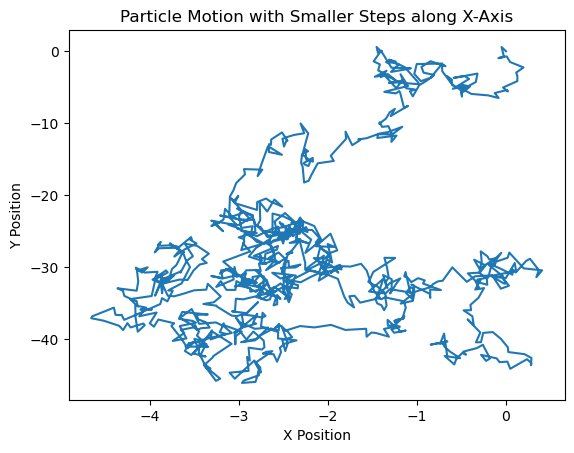

In [79]:
import numpy as np

class ParticleMotion:
    """
    A class to simulate the motion of a particle with smaller steps along the x-axis compared to the y-axis.
    """
    def __init__(self, x0=0, y0=0, x_std_dev=0.5, y_std_dev=1.0):
        """
        Initializes the class with initial positions and standard deviations for the x and y axes.
        
        Arguments:
            x0: Initial x-coordinate (default is 0).
            y0: Initial y-coordinate (default is 0).
            x_std_dev: Standard deviation for steps along the x-axis (default is 0.5).
            y_std_dev: Standard deviation for steps along the y-axis (default is 1.0).
        """
        assert isinstance(x0, (int, float)), "x0 should be an integer or float."
        assert isinstance(y0, (int, float)), "y0 should be an integer or float."
        assert isinstance(x_std_dev, (int, float)) and x_std_dev > 0, "x_std_dev should be a positive number."
        assert isinstance(y_std_dev, (int, float)) and y_std_dev > 0, "y_std_dev should be a positive number."

        self.x0 = x0
        self.y0 = y0
        self.x_std_dev = x_std_dev
        self.y_std_dev = y_std_dev
    
    def generate_motion(self, n_steps=100):
        """
        Generates the motion of the particle over a given number of steps.
        
        Arguments:
            n_steps: The number of steps to simulate (default is 100).
            
        Returns:
            A tuple of arrays (x_positions, y_positions) representing the particle's path.
        """
        # Initialize arrays for positions
        x_positions = np.zeros(n_steps)
        y_positions = np.zeros(n_steps)
        
        # Set the initial positions
        x_positions[0] = self.x0
        y_positions[0] = self.y0
        
        # Generate motion
        for i in range(1, n_steps):
            # Generate a random step along the x-axis using a smaller standard deviation
            x_step = np.random.normal(0, self.x_std_dev)
            # Generate a random step along the y-axis using a larger standard deviation
            y_step = np.random.normal(0, self.y_std_dev)
            
            # Update positions
            x_positions[i] = x_positions[i - 1] + x_step
            y_positions[i] = y_positions[i - 1] + y_step
        
        return x_positions, y_positions

# Example usage:
# Create an instance of ParticleMotion
particle = ParticleMotion(x_std_dev=0.1, y_std_dev=1.0)

# Generate motion for 1000 steps
x_positions, y_positions = particle.generate_motion(1000)

# Plot the motion
import matplotlib.pyplot as plt

plt.plot(x_positions, y_positions)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Particle Motion with Smaller Steps along X-Axis')
plt.show()
